# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# Import Data

In [2]:
data = pd.read_csv('crime_data.csv')

# EDA

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# DBSCAN

In [6]:
data_norm=StandardScaler().fit_transform(data)
data_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [7]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(data_norm)

DBSCAN(eps=1, min_samples=4)

In [8]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [9]:
data['clusters']=dbscan.labels_
data

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [10]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


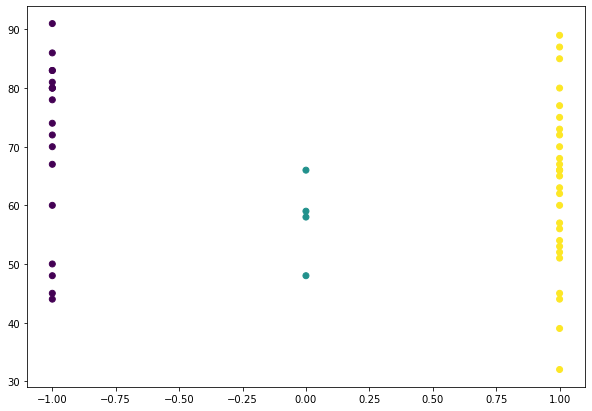

In [11]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters'],data['UrbanPop'], c=dbscan.labels_) 

# K Means Clustering

In [12]:
from sklearn.cluster import	KMeans

In [13]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy = pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y

<AxesSubplot:xlabel='X', ylabel='Y'>

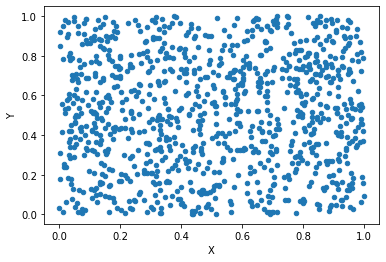

In [14]:
df_xy.plot(x="X", y="Y", kind = "scatter")

In [15]:
model1 = KMeans(n_clusters = 4).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

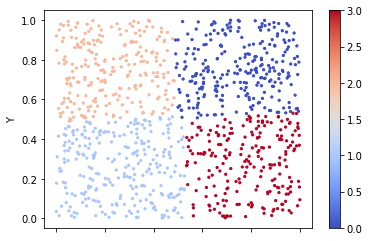

In [16]:
df_xy.plot(x = "X", y = "Y", c = model1.labels_, kind="scatter", s = 5, cmap = plt.cm.coolwarm)

In [17]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [18]:
clusters=KMeans(4,random_state=30).fit(data_norm)
clusters

KMeans(n_clusters=4, random_state=30)

In [19]:
clusters.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [20]:
data1=data.copy()
data1['clustersid']=clusters.labels_
data1

,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,3
2,8.1,294,80,31.0,-1,3
3,8.8,190,50,19.5,-1,0
4,9.0,276,91,40.6,-1,3
5,7.9,204,78,38.7,-1,3
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,-1,1
8,15.4,335,80,31.9,-1,3
9,17.4,211,60,25.8,-1,0


In [21]:
clusters.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [22]:
data1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500,-0.500000
1,1,5.656250,138.875000,73.875000,18.781250,0.750000
2,2,3.600000,78.538462,52.076923,12.176923,1.000000
3,3,10.815385,257.384615,76.000000,33.192308,-0.846154


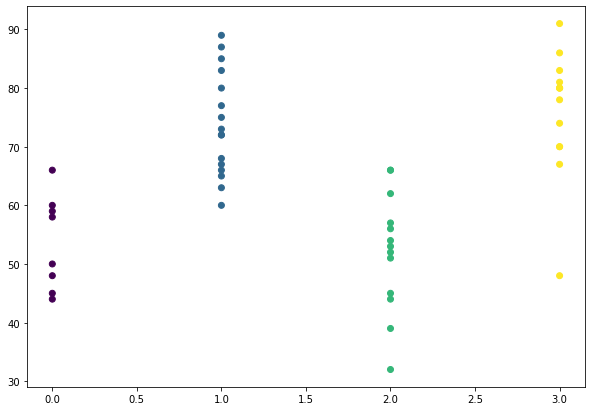

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['clustersid'],data1['UrbanPop'], c=clusters.labels_) 

# Hierarchical Clustering

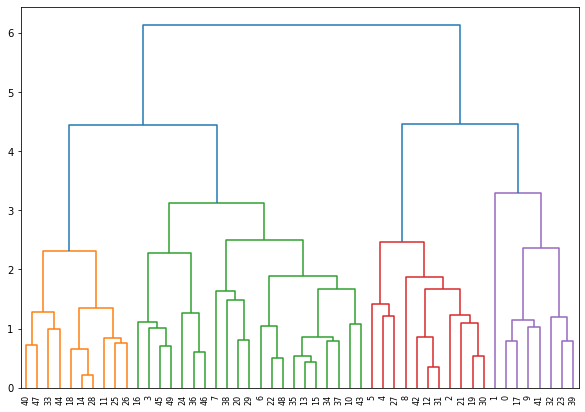

In [24]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(data_norm,'complete'))

In [25]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [26]:
y=pd.DataFrame(hclusters.fit_predict(data_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    15
0    12
2    12
3     7
4     4
Name: clustersid, dtype: int64

In [27]:
data['clustersid']=hclusters.labels_
data

,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,13.2,236,58,21.2,0,3
1,10.0,263,48,44.5,-1,0
2,8.1,294,80,31.0,-1,0
3,8.8,190,50,19.5,-1,4
4,9.0,276,91,40.6,-1,0
5,7.9,204,78,38.7,-1,0
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,-1,1
8,15.4,335,80,31.9,-1,0
9,17.4,211,60,25.8,-1,3


In [28]:
data.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,10.966667,264.000000,76.500000,33.608333,-1.000000
1,1,5.613333,138.866667,75.266667,19.493333,0.733333
2,2,3.091667,76.000000,52.083333,11.833333,1.000000
3,3,14.671429,251.285714,54.285714,21.685714,-0.428571
4,4,8.450000,154.000000,56.250000,18.025000,0.500000


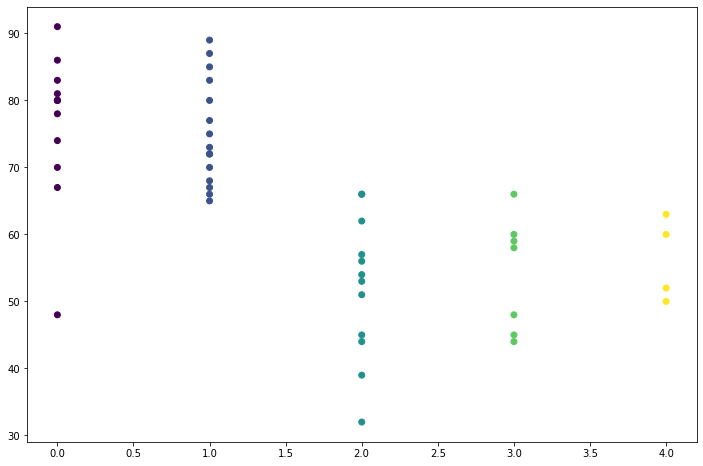

In [29]:
plt.figure(figsize=(12, 8))  
plt.scatter(data['clustersid'],data['UrbanPop'], c=hclusters.labels_)